In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from pandas import datetime
from sqlalchemy import create_engine 
sb.set_style('darkgrid')
%matplotlib inline  # ensuring that plot shown is inline

UsageError: unrecognized arguments: # ensuring that plot shown is inline


In [2]:
data=pd.read_csv('sales.csv')

In [3]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [4]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [5]:
data.shape

(7422, 9)

In [6]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [7]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [8]:
from collections import Counter
Counter(data.Status)

Counter({'Open': 82,
         'Potential': 708,
         'In Progress Positive': 643,
         'Not Responding': 1129,
         'Just Enquiry': 760,
         'Junk Lead': 1536,
         'CONVERTED': 834,
         'In Progress Negative': 626,
         'LOST': 440,
         'Long Term': 646,
         'converted': 18})

In [9]:
df=data.iloc[:,[0,1,2,5,6,7,8]]

In [10]:
df.dropna(inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,13-11-2018 18:48,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,13-11-2018 17:09,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,13-11-2018 16:49,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,13-11-2018 16:37,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [12]:
df.shape

(7328, 7)

In [13]:
pd.unique(df.Sales_Agent)

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [14]:
pd.unique(df.Delivery_Mode)

array(['Mode-1', 'Mode-5', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [15]:
Counter(df.Sales_Agent)

Counter({'Sales-Agent-3': 780,
         'Sales-Agent-4': 1495,
         'Sales-Agent-11': 1414,
         'Sales-Agent-7': 734,
         'Sales-Agent-9': 878,
         'Sales-Agent-8': 68,
         'Sales-Agent-5': 1182,
         'Sales-Agent-2': 389,
         'Sales-Agent-12': 269,
         'Sales-Agent-10': 5,
         'Sales-Agent-6': 114})

In [16]:
df.describe(include='object')

,Created,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7328,7328,7328,7328,7328,7328
unique,6667,25,11,17,5,11
top,15-10-2018 10:36,Call,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2536,1495,2481,2903,1532


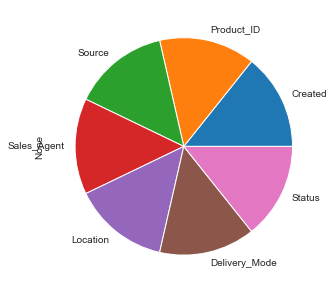

In [17]:
plt.figure(figsize=(15,5))
df.notnull().sum().plot('pie')

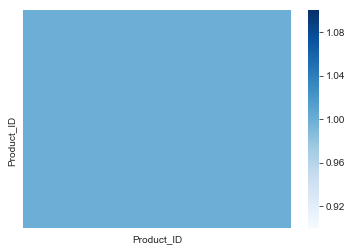

In [18]:
sb.heatmap(df.corr(),cmap='Blues',annot=False)

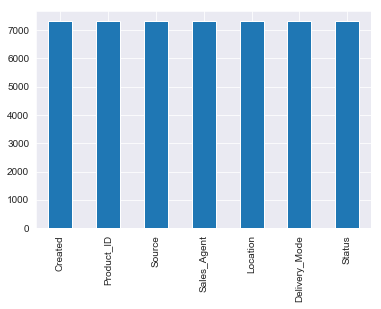

In [19]:
df.notnull().sum().plot('bar')

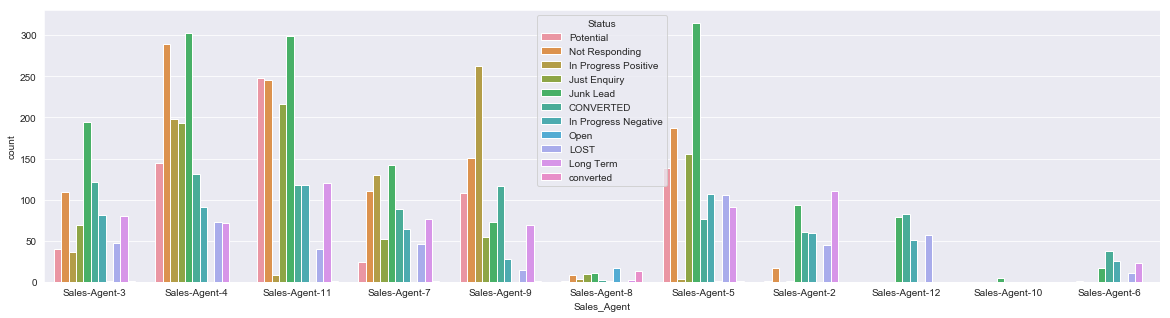

In [20]:
plt.figure(figsize=(20,5))
sb.countplot(data=df,x='Sales_Agent',hue='Status')
plt.show()

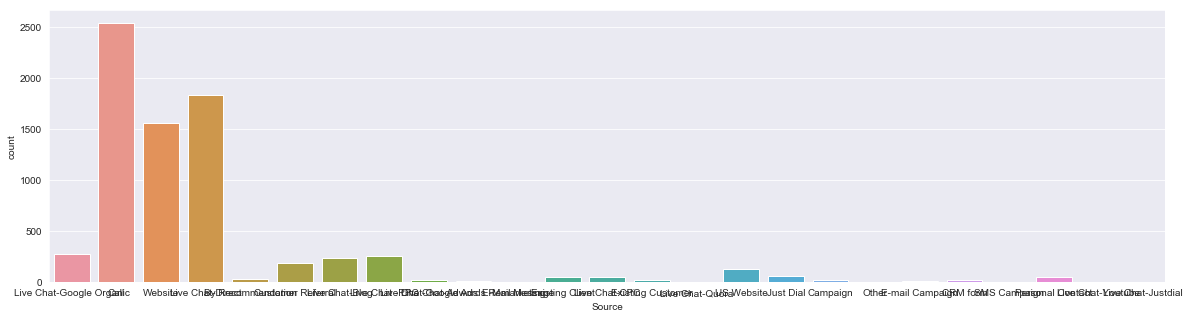

In [21]:
plt.figure(figsize=(20,5))
sb.countplot(x='Source',data=df)
plt.show()

In [22]:
df.Delivery_Mode=df.Delivery_Mode.map({'Mode-1':1, 'Mode-2':2, 'Mode-3':3, 'Mode-4':4, 'Mode-5':5})

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,1,Potential
19,13-11-2018 18:48,19.0,Call,Sales-Agent-4,Other Locations,5,Potential
24,13-11-2018 17:09,18.0,Website,Sales-Agent-11,Trivandrum,1,Potential
25,13-11-2018 16:49,15.0,Website,Sales-Agent-7,Hyderabad,1,Not Responding
26,13-11-2018 16:37,18.0,Call,Sales-Agent-7,Bangalore,1,In Progress Positive


In [24]:
sales=['Sales-Agent-2', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-5', 'Sales-Agent-6', 'Sales-Agent-7',
       'Sales-Agent8', 'Sales-Agent-9', 'Sales-Agent-10','Sales-Agent-11',
       'Sales-Agent-12']

In [25]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [26]:
#df.Sales_Agent=df.Sales_Agent.map(dict(pd.Series(sales,index=np.arange(2,13))))

In [27]:
df.Sales_Agent=df.Sales_Agent.map({'Sales-Agent-2':2,'Sales-Agent-3':3,'Sales-Agent-4':4,'Sales-Agent-5':5,'Sales-Agent-6':6,
  'Sales-Agent-7':7,'Sales-Agent-8':8,'Sales-Agent-9':9,'Sales-Agent-10':10, 'Sales-Agent-11':11, 'Sales-Agent-12':12})

In [28]:
pd.unique(df.Sales_Agent)

array([ 3,  4, 11,  7,  9,  8,  5,  2, 12, 10,  6], dtype=int64)

In [29]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,3,Bangalore,1,Potential
19,13-11-2018 18:48,19.0,Call,4,Other Locations,5,Potential
24,13-11-2018 17:09,18.0,Website,11,Trivandrum,1,Potential
25,13-11-2018 16:49,15.0,Website,7,Hyderabad,1,Not Responding
26,13-11-2018 16:37,18.0,Call,7,Bangalore,1,In Progress Positive


In [30]:
Counter(df.Source)

Counter({'Live Chat-Google Organic': 269,
         'Call': 2536,
         'Website': 1551,
         'Live Chat-Direct': 1827,
         'By Recommendation': 32,
         'Customer Referral': 180,
         'Live Chat-Blog': 237,
         'Live Chat -PPC': 249,
         'Live Chat-Google Ads': 20,
         'Live Chat-Adwords Remarketing': 7,
         'E-Mail Message': 1,
         'Existing Client': 51,
         'Live Chat-CPC': 49,
         'Existing Customer': 22,
         'Live Chat-Quora': 2,
         'US Website': 129,
         'Just Dial': 56,
         'Campaign': 19,
         'Other': 2,
         'E-mail Campaign': 12,
         'CRM form': 22,
         'SMS Campaign': 2,
         'Personal Contact': 50,
         'Live Chat-Youtube': 2,
         'Live Chat-Justdial': 1})

In [31]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df.Location=enc.fit_transform(df.Location)
df.Source=enc.fit_transform(df.Source)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
Counter(df.Status)

Counter({'Potential': 705,
         'Not Responding': 1119,
         'In Progress Positive': 642,
         'Just Enquiry': 751,
         'Junk Lead': 1532,
         'CONVERTED': 834,
         'In Progress Negative': 625,
         'Open': 19,
         'LOST': 439,
         'Long Term': 644,
         'converted': 18})

In [33]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,16,3,1,1,Potential
19,13-11-2018 18:48,19.0,2,4,10,5,Potential
24,13-11-2018 17:09,18.0,24,11,13,1,Potential
25,13-11-2018 16:49,15.0,24,7,6,1,Not Responding
26,13-11-2018 16:37,18.0,2,7,1,1,In Progress Positive


In [36]:
def status(s ):
        if s=='Potential':
            return 1
        elif s=='In Progress Positive':
            return 1
        elif s=='Open':
            return 1
        elif s=='CONVERTED':
            return 1
        elif s=='converted':
            return 1
        elif s=='Long Term':
            return 1
        else:
            return 0

In [37]:
pd.unique(df.Status)

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [38]:
df.Status=df.Status.apply(status)

In [39]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [40]:
Counter(df.Status)

Counter({1: 2862, 0: 4466})

In [41]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,16,3,1,1,1
19,13-11-2018 18:48,19.0,2,4,10,5,1
24,13-11-2018 17:09,18.0,24,11,13,1,1
25,13-11-2018 16:49,15.0,24,7,6,1,0
26,13-11-2018 16:37,18.0,2,7,1,1,1


In [42]:
df.dtypes

Created           object
Product_ID       float64
Source             int32
Sales_Agent        int64
Location           int32
Delivery_Mode      int64
Status             int64
dtype: object

In [43]:
df.reset_index(inplace=True)

In [44]:
X=df.iloc[:,[3,4,5,6]]
y=df.iloc[:,-1]

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
from xgboost import XGBClassifier 
model = XGBClassifier(n_estimators=20,random_state=10,max_depth=6,learning_rate=0.45)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [128]:
print(accuracy_score(y_test, y_predict))

0.7035015916325602


In [129]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Status,,
0,1109,210
1,442,438


In [130]:
confusion_matrix(y_test,y_predict)

array([[1109,  210],
       [ 442,  438]], dtype=int64)

In [131]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1319
           1       0.68      0.50      0.57       880

    accuracy                           0.70      2199
   macro avg       0.70      0.67      0.67      2199
weighted avg       0.70      0.70      0.69      2199

